In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import h5py
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix, f1_score
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten, BatchNormalization, Dropout
from tensorflow.keras.utils import normalize
from keras.callbacks.callbacks import EarlyStopping
from keras import regularizers
from keras import optimizers

Using TensorFlow backend.


<h3>Split data into training, validation, and test set</h3>

In [3]:
dataset = h5py.File('C://Users//Anu//Downloads//SVHN_single_grey1.h5','r')
print(dataset.keys())

<KeysViewHDF5 ['X_test', 'X_train', 'X_val', 'y_test', 'y_train', 'y_val']>


In [4]:
X_train = np.array(dataset['X_train'])
X_val = np.array(dataset['X_val'])
X_test = np.array(dataset['X_test'])
y_train = np.array(dataset['y_train'])
y_val = np.array(dataset['y_val'])
y_test = np.array(dataset['y_test'])

In [5]:
print("X_train:", X_train.shape)
print("X_test:", X_test.shape)
print("X_val:", X_val.shape)
print("y_train:", y_train.shape)
print("y_test:", y_test.shape)
print("y_val:", y_val.shape)

X_train: (42000, 32, 32)
X_test: (18000, 32, 32)
X_val: (60000, 32, 32)
y_train: (42000,)
y_test: (18000,)
y_val: (60000,)


<h3>Normalizing the image data</h3>

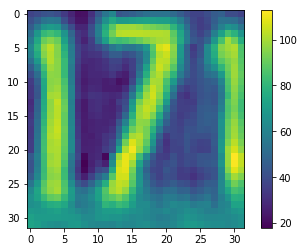

In [6]:
plt.figure()
plt.imshow(X_train[8])
plt.colorbar()

In [7]:
X_train = normalize(X_train, axis=-1, order=2)
X_test = normalize(X_test, axis=-1, order=2)
X_val = normalize(X_val, axis=-1, order=2)

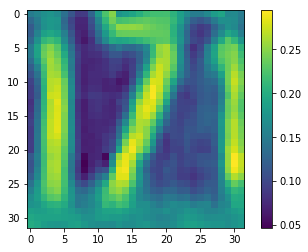

In [8]:
plt.figure()
plt.imshow(X_train[8])
plt.colorbar()

In [9]:
class_labels = [1,2,3,4,5,6,7,8,9,0]

<h2>Using K Nearest Neighbours Classifier</h2>

In [10]:
X_train_knn = X_train.reshape((42000,1024))

In [11]:
X_test_knn = X_test.reshape((18000,1024))

In [12]:
knn = KNeighborsClassifier(n_neighbors=20, weights='distance', n_jobs=-1)
knn.fit(X_train_knn, y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=-1, n_neighbors=20, p=2,
           weights='distance')

In [13]:
pred = knn.predict(X_test_knn)

In [14]:
knn.score(X_test_knn, y_test)

0.6224444444444445

<h2>Using Neural Networks</h2>

In [15]:
optima = optimizers.Adam(learning_rate=0.001)
monitor = EarlyStopping(monitor='val_loss', patience=20, verbose=1, mode='auto', restore_best_weights=True)

In [25]:
model = Sequential()
model.add(Flatten(input_shape=(32, 32)))
model.add(Dense(512, activation='relu', activity_regularizer= regularizers.l2(0.01)))
model.add(BatchNormalization(axis=1))
model.add(Dense(256, activation='relu', activity_regularizer= regularizers.l2(0.01)))
model.add(BatchNormalization(axis=1))
model.add(Dense(128, activation='relu', activity_regularizer= regularizers.l2(0.01)))
model.add(BatchNormalization(axis=1))
model.add(Dense(64, activation='relu', activity_regularizer= regularizers.l2(0.01)))
model.add(BatchNormalization(axis=1))
model.add(Dense(32, activation='relu', activity_regularizer= regularizers.l2(0.01)))
model.add(BatchNormalization(axis=1))
model.add(Dense(10, activation='softmax'))

In [26]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten_1 (Flatten)          (None, 1024)              0         
_________________________________________________________________
dense_7 (Dense)              (None, 512)               524800    
_________________________________________________________________
batch_normalization_6 (Batch (None, 512)               2048      
_________________________________________________________________
dense_8 (Dense)              (None, 256)               131328    
_________________________________________________________________
batch_normalization_7 (Batch (None, 256)               1024      
_________________________________________________________________
dense_9 (Dense)              (None, 128)               32896     
_________________________________________________________________
batch_normalization_8 (Batch (None, 128)              

In [27]:
model.compile(optimizer='adam', loss = 'sparse_categorical_crossentropy', metrics = ['accuracy'])

In [28]:
model.fit(X_train, y_train, batch_size=500, epochs=200, verbose=1, validation_data=(X_val,y_val), callbacks=[monitor])

Train on 42000 samples, validate on 60000 samples
Epoch 1/200
42000/42000 [==============================] - 4s 102us/sample - loss: 3.1123 - acc: 0.4522 - val_loss: 2.4549 - val_acc: 0.1000
Epoch 2/200
42000/42000 [==============================] - 3s 70us/sample - loss: 1.9188 - acc: 0.6342 - val_loss: 2.4573 - val_acc: 0.1011
Epoch 3/200
42000/42000 [==============================] - 3s 69us/sample - loss: 1.5459 - acc: 0.6708 - val_loss: 2.3819 - val_acc: 0.1234
Epoch 4/200
42000/42000 [==============================] - 3s 73us/sample - loss: 1.3178 - acc: 0.7076 - val_loss: 2.2333 - val_acc: 0.2187
Epoch 5/200
42000/42000 [==============================] - 3s 67us/sample - loss: 1.1764 - acc: 0.7265 - val_loss: 2.0086 - val_acc: 0.3482
Epoch 6/200
42000/42000 [==============================] - 3s 70us/sample - loss: 1.0620 - acc: 0.7547 - val_loss: 2.0871 - val_acc: 0.3453
Epoch 7/200
42000/42000 [==============================] - 3s 70us/sample - loss: 0.9876 - acc: 0.7659 - val_

Epoch 59/200
42000/42000 [==============================] - 3s 68us/sample - loss: 0.3410 - acc: 0.9204 - val_loss: 2.0648 - val_acc: 0.5693
Epoch 60/200
42000/42000 [==============================] - 3s 68us/sample - loss: 0.3475 - acc: 0.9186 - val_loss: 2.3344 - val_acc: 0.5035
Epoch 61/200
42000/42000 [==============================] - 3s 67us/sample - loss: 0.3328 - acc: 0.9218 - val_loss: 1.4623 - val_acc: 0.6441
Epoch 62/200
42000/42000 [==============================] - 3s 73us/sample - loss: 0.3345 - acc: 0.9234 - val_loss: 2.0452 - val_acc: 0.6016
Epoch 63/200
42000/42000 [==============================] - 3s 69us/sample - loss: 0.3249 - acc: 0.9260 - val_loss: 1.3410 - val_acc: 0.6979
Epoch 64/200
42000/42000 [==============================] - 3s 67us/sample - loss: 0.3394 - acc: 0.9205 - val_loss: 1.1718 - val_acc: 0.7166
Epoch 65/200
42000/42000 [==============================] - 3s 71us/sample - loss: 0.3184 - acc: 0.9271 - val_loss: 1.5375 - val_acc: 0.6410
Epoch 66/200


In [36]:
pred = model.predict(X_test)

In [37]:
pred[3]

array([2.6510310e-05, 9.4335172e-07, 7.5850781e-05, 3.0953106e-05,
       4.3881901e-05, 5.7709976e-06, 4.9328687e-06, 1.9641002e-05,
       8.2891944e-05, 9.9970859e-01], dtype=float32)

In [38]:
np.argmax(pred[3])

9

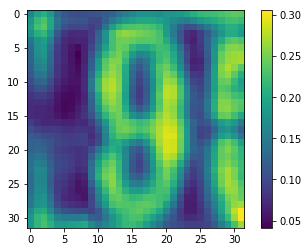

In [40]:
plt.figure()
plt.imshow(X_test[3])
plt.colorbar()

#     Accuracy comparison
    Neural Networks : 93% in Training and 68% in test set
    KNN             : 62%
    